In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

In [2]:
raw_data=pd.read_csv('Ruppert Dataset/CPS1988.csv')

In [3]:
raw_data.head()

,wage,education,experience,ethnicity,smsa,region,parttime
0,354.94,7,45,cauc,yes,northeast,no
1,123.46,12,1,cauc,yes,northeast,yes
2,370.37,9,9,cauc,yes,northeast,no
3,754.94,11,46,cauc,yes,northeast,no
4,593.54,12,36,cauc,yes,northeast,no


In [4]:
model=ols('wage~education+experience+ethnicity',data=raw_data)
result=model.fit()

In [5]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2097.
Date:                Wed, 26 Apr 2017   Prob (F-statistic):               0.00
Time:                        00:02:40   Log-Likelihood:            -2.0934e+05
No. Observations:               28155   AIC:                         4.187e+05
Df Residuals:                   28151   BIC:                         4.187e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          -490.5629     15.157    -32.365      0.000      -520.272  -460.854
ethnicity[T.cauc]   128.3219      9.072     14.145      0.000       110.541   146.103
education            59.9646      0.882     67.971      0.000        58.235    61.694
experience           10.5787      0.195     54.236      0.000        10.196    10.961
==============================================================================
Omnibus:                    40705.622   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69434162.059
Skew:                           8.068   Prob(JB):                         0.00
Kurtosis:                     245.749   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from statsmodels.stats.outliers_influence import OLSInfluence
resid_analysis=OLSInfluence(result)


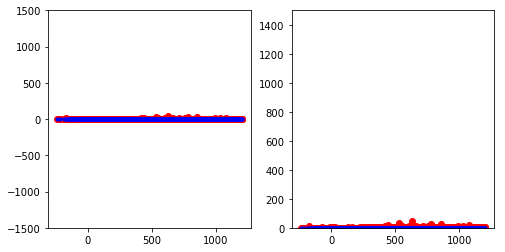

In [7]:
#plot the residual analysis
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax.plot(result.fittedvalues,resid_analysis.get_resid_studentized_external(), 'ro', label="OLS");
low=lowess(resid_analysis.get_resid_studentized_external(),result.fittedvalues,frac=0.2)
ax.plot(low[:,0],low[:,1],'b--.', label="Lowess")
ax.set_ylim([-1500,1500]);

ax1.plot(result.fittedvalues,np.abs(resid_analysis.get_resid_studentized_external()), 'ro', label="OLS");
low=lowess(np.abs(resid_analysis.get_resid_studentized_external()),result.fittedvalues,frac=0.2)
ax1.plot(low[:,0],low[:,1],'b--.', label="Lowess")
ax1.set_ylim([0,1500]);


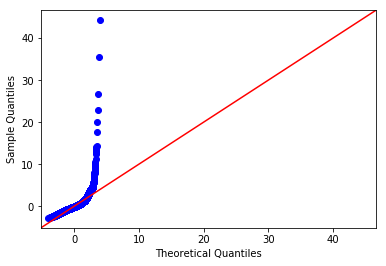

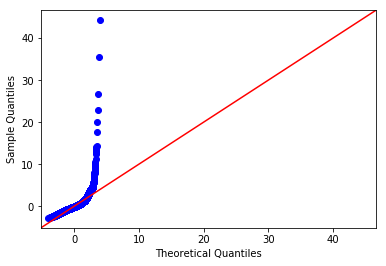

In [10]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data=resid_analysis.get_resid_studentized_external(),line='45')

/Users/Russell/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/Russell/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/Users/Russell/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


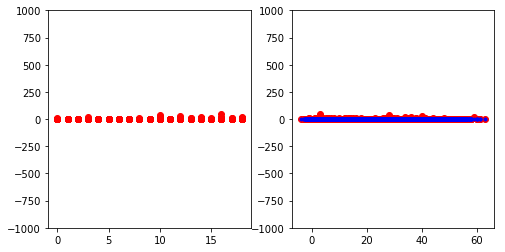

In [9]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax.plot(raw_data.education,resid_analysis.get_resid_studentized_external(), 'ro', label="OLS");
low=lowess(resid_analysis.get_resid_studentized_external(),raw_data.education,frac=0.2)
ax.plot(low[:,0],low[:,1],'b--.', label="Lowess")
ax.set_ylim([-1000,1000]);

ax1.plot(raw_data.experience,resid_analysis.get_resid_studentized_external(), 'ro', label="OLS");
low=lowess(resid_analysis.get_resid_studentized_external(),raw_data.experience,frac=0.2)
ax1.plot(low[:,0],low[:,1],'b--.', label="Lowess")
ax1.set_ylim([-1000,1000]);